In [ ]:
import sys
print(sys.version)


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras . models import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy, Precision, Recall, F1Score
from keras . utils import to_categorical
import numpy as np
import pandas as pd
import pickle
import re
import random
import os

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras . models import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy, Precision, Recall, F1Score
from keras . utils import to_categorical
import numpy as np
import pandas as pd
import pickle
import re
import random
import os

In [ ]:
'''import os

def read_text_files(folder_path):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    concatenated_content = ""

    for file in files:
        if file.endswith('.txt'):
            file_path = os.path.join(folder_path, file)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read()
                    concatenated_content += content
            except UnicodeDecodeError as e:
                print(f"Error reading file {file}: {e}")
                continue

    return concatenated_content

# Specify the path to the folder containing text files
folder_path = '/content/drive/MyDrive/ML DATASET/UPDATED'

# Call the function to read and concatenate text files in the specified folder
raw1 = read_text_files(folder_path)

raw1 = raw1.lower()  # Uncomment this line if you want to convert the text to lowercase
print(type(raw1))
print(raw1[:100])  # Print the first 100 characters as a sample
'''

'import os\n\ndef read_text_files(folder_path):\n    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]\n    concatenated_content = ""\n\n    for file in files:\n        if file.endswith(\'.txt\'):\n            file_path = os.path.join(folder_path, file)\n            try:\n                with open(file_path, \'r\', encoding=\'utf-8\') as f:\n                    content = f.read()\n                    concatenated_content += content\n            except UnicodeDecodeError as e:\n                print(f"Error reading file {file}: {e}")\n                continue\n\n    return concatenated_content\n\n# Specify the path to the folder containing text files\nfolder_path = \'/content/drive/MyDrive/ML DATASET/UPDATED\'\n\n# Call the function to read and concatenate text files in the specified folder\nraw1 = read_text_files(folder_path)\n\nraw1 = raw1.lower()  # Uncomment this line if you want to convert the text to lowercase\nprint(type(raw1))\nprint(ra

In [ ]:
file="/content/drive/MyDrive/ML DATASET/COMBINED_FIN.txt"
raw1=open(file,'r').read()
raw1=raw1.lower();

In [ ]:
raw1 = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", raw1)

In [ ]:

raw1=''.join(c for c in raw1 if not c.isdigit() )
print(raw1[1])


u


In [ ]:
print(raw1[:15])

   ways to writ


In [ ]:

word1=raw1.split()

In [ ]:
tokenizer=Tokenizer()
tokenizer. fit_on_texts( [word1] )
pickle . dump(tokenizer, open( '/content/drive/MyDrive/ML DATASET/PKLH5/token_test_2.pkl','wb'))
sequence_data = tokenizer.texts_to_sequences([word1])[0]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
len(sequence_data)

15634743

In [ ]:
vocab_size =len(tokenizer. word_index) + 1
print(vocab_size)

778887


In [ ]:
sequences=[]
for i in range(3, len(sequence_data)):
  words = sequence_data[i-3:i+1]
  sequences. append ( words )
sequences=np.array(sequences)
sequences[:1]

array([[330,   2, 219,  34]])

In [ ]:
import numpy as np

X = np.array([seq[0:3] for seq in sequences])
y = np.array([seq[3] for seq in sequences])


In [ ]:
print(len(X),len(y))

6974 6974


**LSTM MODEL**

In [ ]:
y= to_categorical(y,num_classes=vocab_size)
y[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
#from tensorflow import keras
#from keras.utils.vis_utils import plot_model
#keras.utils.plot_model (model,to_file='model.jpg',show_layer_names=True)

# New Section

In [ ]:
model = Sequential ( )
model.add(Embedding(vocab_size,10,input_length=3))
model. add(LSTM(1000,return_sequences=True) )
model. add(LSTM(1000))
model. add (Dense( 1000, activation='relu'))
model. add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 10)             15900     
                                                                 
 lstm_2 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 1590)              1591590   
                                                                 
Total params: 14656490 (55.91 MB)
Trainable params: 14656490 (55.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

from tensorflow.keras.callbacks  import ModelCheckpoint
checkpoint=ModelCheckpoint("next_words.h5",monitor='loss',verbose=1,save_best_only=True)
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.003),
    metrics=[
        "accuracy",
        F1Score(),
    ]
)
history=model.fit(X,y,epochs=200,batch_size=64,callbacks=[checkpoint])

Epoch 1/200
107/109 [============================>.] - ETA: 0s - loss: 6.5861 - accuracy: 0.0317 - f1_score: 1.3701e-04
Epoch 1: loss improved from inf to 6.58127, saving model to next_words.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


109/109 [==============================] - 13s 62ms/step - loss: 6.5813 - accuracy: 0.0323 - f1_score: 1.3838e-04
Epoch 2/200
107/109 [============================>.] - ETA: 0s - loss: 6.1399 - accuracy: 0.0390 - f1_score: 1.1081e-04
Epoch 2: loss improved from 6.58127 to 6.13884, saving model to next_words.h5
109/109 [==============================] - 2s 18ms/step - loss: 6.1388 - accuracy: 0.0396 - f1_score: 1.1283e-04
Epoch 3/200
109/109 [==============================] - ETA: 0s - loss: 5.8884 - accuracy: 0.0539 - f1_score: 3.1571e-04
Epoch 3: loss improved from 6.13884 to 5.88842, saving model to next_words.h5
109/109 [==============================] - 3s 23ms/step - loss: 5.8884 - accuracy: 0.0539 - f1_score: 3.1571e-04
Epoch 4/200
106/109 [============================>.] - ETA: 0s - loss: 5.6395 - accuracy: 0.0573 - f1_score: 5.9239e-04
Epoch 4: loss improved from 5.88842 to 5.64157, saving model to next_words.h5
109/109 [==============================] - 3s 31ms/step - loss: 5.

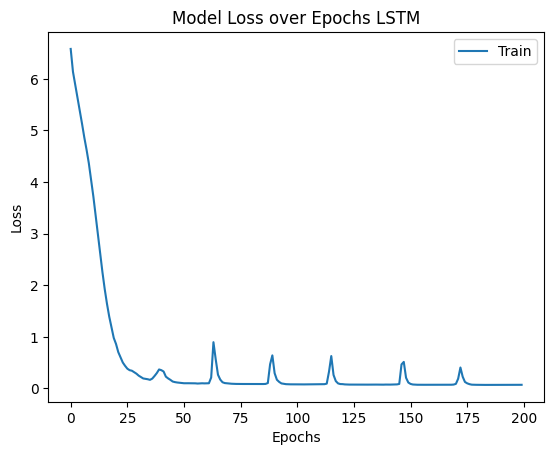

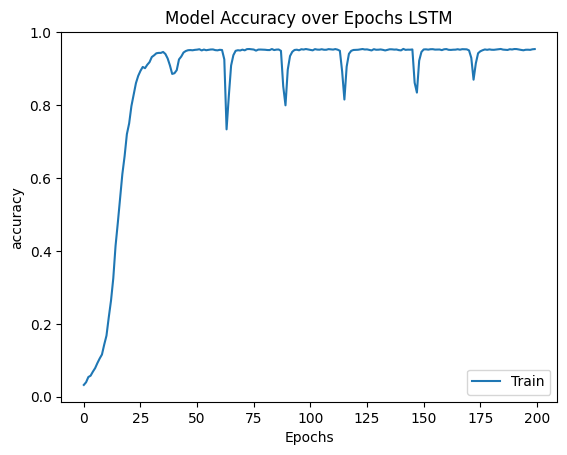

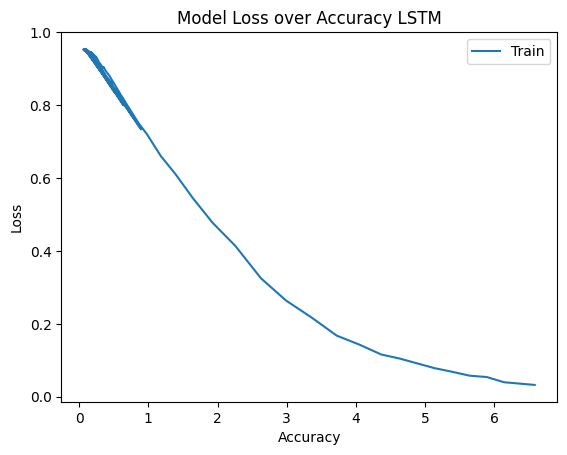

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy over Epochs LSTM')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Train'])
plt.show()

plt.plot(history.history['loss'],history.history['accuracy'])
plt.title('Model Loss over Accuracy LSTM')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()

In [ ]:

from tensorflow.keras.callbacks  import ModelCheckpoint
checkpoint=ModelCheckpoint("/content/drive/MyDrive/NEXT WORD LSTM/acc_next_words.h5",monitor='accuracy',verbose=1,save_best_only=True)
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.003),
    metrics=[
        "accuracy",
        F1Score(),
    ]
)
history_acc=model.fit(X,y,epochs=200,batch_size=64,callbacks=[checkpoint])

Epoch 1/200
107/109 [============================>.] - ETA: 0s - loss: 6.5848 - accuracy: 0.0299 - f1_score: 1.6060e-04
Epoch 1: accuracy improved from -inf to 0.03040, saving model to /content/drive/MyDrive/NEXT WORD LSTM/acc_next_words.h5
109/109 [==============================] - 9s 45ms/step - loss: 6.5821 - accuracy: 0.0304 - f1_score: 1.6419e-04
Epoch 2/200
107/109 [============================>.] - ETA: 0s - loss: 6.1449 - accuracy: 0.0434 - f1_score: 1.2319e-04
Epoch 2: accuracy improved from 0.03040 to 0.04373, saving model to /content/drive/MyDrive/NEXT WORD LSTM/acc_next_words.h5
109/109 [==============================] - 3s 27ms/step - loss: 6.1449 - accuracy: 0.0437 - f1_score: 1.3358e-04
Epoch 3/200
106/109 [============================>.] - ETA: 0s - loss: 5.9070 - accuracy: 0.0461 - f1_score: 3.6698e-04
Epoch 3: accuracy improved from 0.04373 to 0.04631, saving model to /content/drive/MyDrive/NEXT WORD LSTM/acc_next_words.h5
109/109 [==============================] - 2s

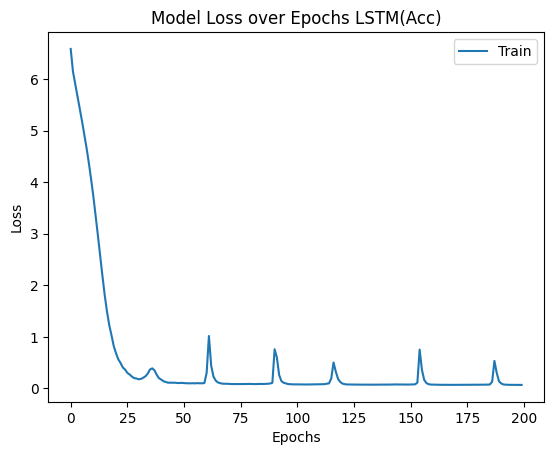

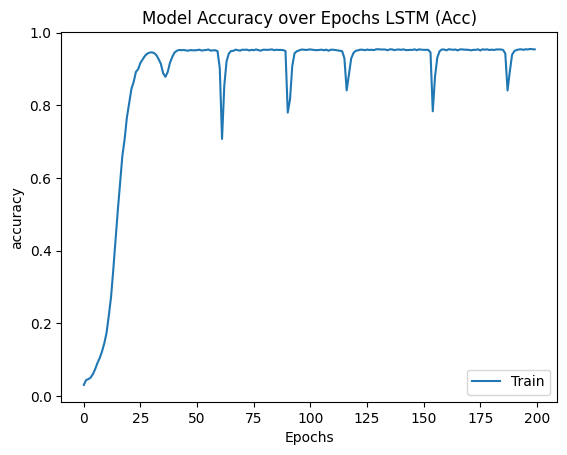

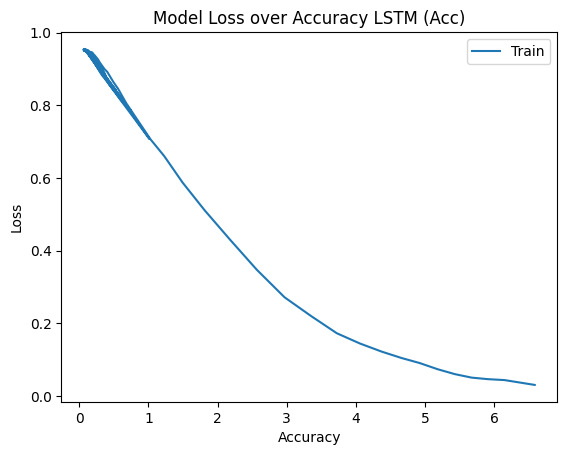

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs LSTM(Acc)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy over Epochs LSTM (Acc)')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Train'])
plt.show()

plt.plot(history.history['loss'],history.history['accuracy'])
plt.title('Model Loss over Accuracy LSTM (Acc)')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()

In [ ]:

from tensorflow.keras.models import load_model
import numpy as np
import pickle
model =load_model('next_words.h5')
tokenizer=pickle.load(open("/content/drive/MyDrive/ML DATASET/PKLH5/token_test_l.pkl",'rb'))

def Predect(model,tokenizer,text):

  sequence= tokenizer.texts_to_sequences([text])
  sequence=np.array(sequence)
  pred=np.argmax(model.predict(sequence))
  predicted_word=""
  for key,value in tokenizer.word_index.items():
    if value == pred:
      predicted_word=key
      break

  print(predicted_word)
  return predicted_word

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import F1Score
import numpy as np

# Define your model architecture
vocab_size = 10000
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(700, return_sequences=True))
model.add(LSTM(700))
model.add(Dense(700, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

# Compile your model
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.003),
    metrics=["accuracy", F1Score()]
)

# Specify batch size and epochs
batch_size = 64
num_samples = len(y)
num_epochs = 1

# Train the model using model.fit_generator()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Create a data generator (assuming you have a data generator function)
    data_generator = your_data_generator_function(X, y, vocab_size, batch_size)

    # Train the model using the generator
    history = model.fit_generator(
        data_generator,
        steps_per_epoch=num_samples // batch_size,
        epochs=1,
        validation_split=0.2  # Adjust validation split as needed
    )

    # Print loss and accuracy for the current epoch
    print(f"Loss: {history.history['loss'][0]}, Accuracy: {history.history['accuracy'][0]}")

    # Clear TensorFlow session to release memory
    from tensorflow.keras import backend as K
    K.clear_session()

# Save the final model
model.save("/content/drive/MyDrive/ML DATASET/PKLH5/next_words_final.h5")


In [ ]:
# Compile your model outside the loop
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.003),
    metrics=["accuracy", F1Score()]
)

# Specify the batch size and number of epochs
batch_size = 64
num_samples = len(y)
num_epochs = 200

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Train the model using batches
    for i in range(0, num_samples, batch_size):
        # Select a batch of data
        batch_X = X[i:i+batch_size]
        batch_y = y[i:i+batch_size]
        batch_categorical_y = to_categorical(batch_y, num_classes=num_classes)

        # Train the model with the current batch
        history = model.train_on_batch(batch_X, batch_categorical_y)

    # Save the model at the end of each epoch
    model.save("/content/drive/MyDrive/ML DATASET/PKLH5/next_words_epoch_{}.h5".format(epoch + 1))


In [ ]:
num_classes=vocab_size
y= to_categorical(y,num_classes)
len(y[1])

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(700, return_sequences=True))
model.add(LSTM(700))
model.add(Dense(700, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

from tensorflow.keras.callbacks  import ModelCheckpoint
checkpoint=ModelCheckpoint("/content/drive/MyDrive/ML DATASET/PKLH5/next_words_acc.h5",monitor='accuracy',verbose=1,save_best_only=True)
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.003),
    metrics=[
        "loss",
        F1Score(),
    ]
)
history=model.fit(X,y,epochs=200,batch_size=64,callbacks=[checkpoint])

Epoch 1/200


ValueError: ignored

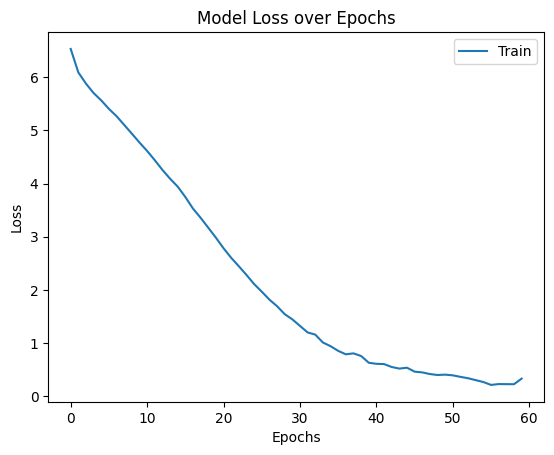

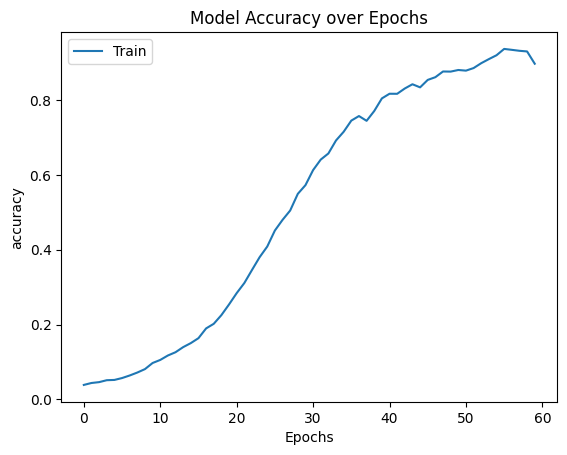

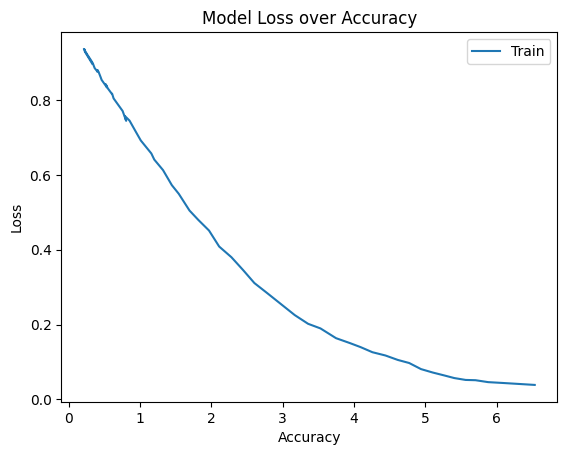

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Train'])
plt.show()

plt.plot(history.history['loss'],history.history['accuracy'])
plt.title('Model Loss over Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()




In [ ]:
from tensorflow.keras.callbacks  import ModelCheckpoint
checkpoint=ModelCheckpoint("/content/drive/MyDrive/ML DATASET/PKLH5/next_words_acc.h5",monitor='accuracy',verbose=1,save_best_only=True)
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.003),
    metrics=[
        "accuracy",
        F1Score(),
    ]
)
history=model.fit(X,y,epochs=200,batch_size=64,callbacks=[checkpoint])

Epoch 1/100
105/109 [===========================>..] - ETA: 0s - loss: 6.6038 - accuracy: 0.0302 - f1_score: 1.1261e-04
Epoch 1: accuracy improved from -inf to 0.03040, saving model to /content/drive/MyDrive/ML DATASET/PKLH5/next_words_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


109/109 [==============================] - 11s 48ms/step - loss: 6.5917 - accuracy: 0.0304 - f1_score: 1.2498e-04
Epoch 2/100
107/109 [============================>.] - ETA: 0s - loss: 6.0887 - accuracy: 0.0418 - f1_score: 1.3560e-04
Epoch 2: accuracy improved from 0.03040 to 0.04158, saving model to /content/drive/MyDrive/ML DATASET/PKLH5/next_words_acc.h5
109/109 [==============================] - 3s 25ms/step - loss: 6.0895 - accuracy: 0.0416 - f1_score: 1.3441e-04
Epoch 3/100
106/109 [============================>.] - ETA: 0s - loss: 5.8884 - accuracy: 0.0454 - f1_score: 1.4605e-04
Epoch 3: accuracy improved from 0.04158 to 0.04474, saving model to /content/drive/MyDrive/ML DATASET/PKLH5/next_words_acc.h5
109/109 [==============================] - 2s 16ms/step - loss: 5.8927 - accuracy: 0.0447 - f1_score: 1.4250e-04
Epoch 4/100
108/109 [============================>.] - ETA: 0s - loss: 5.7268 - accuracy: 0.0498 - f1_score: 3.5229e-04
Epoch 4: accuracy improved from 0.04474 to 0.050

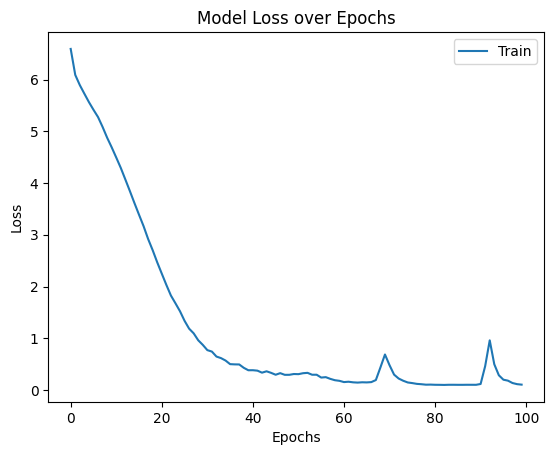

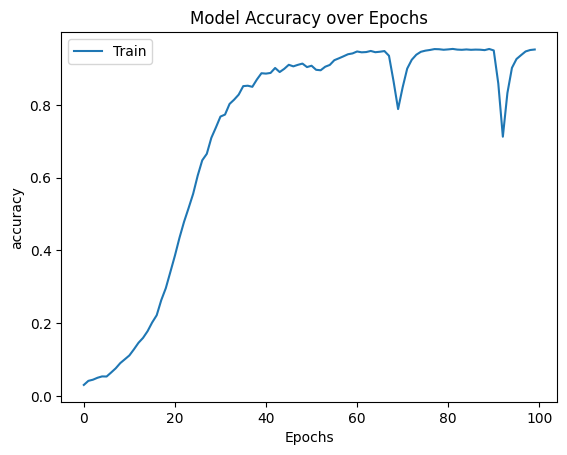

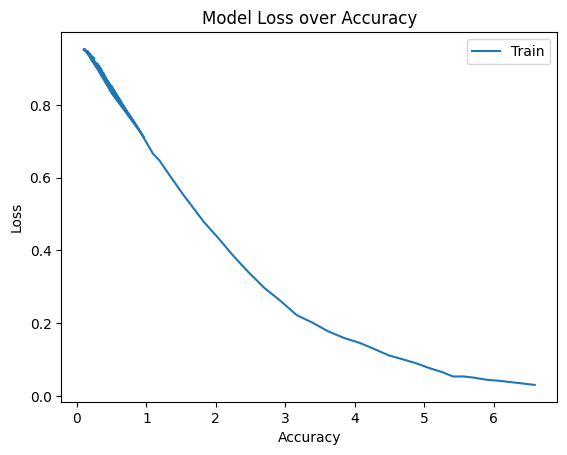

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Train'])
plt.show()

plt.plot(history.history['loss'],history.history['accuracy'])
plt.title('Model Loss over Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
model =load_model('/content/drive/MyDrive/ML DATASET/PKLH5/next_words.h5')
tokenizer=pickle.load(open("/content/drive/MyDrive/ML DATASET/PKLH5/token.pkl",'rb'))

def Predect(model,tokenizer,text):

  sequence= tokenizer.texts_to_sequences([text])
  sequence=np.array(sequence)
  pred=np.argmax(model.predict(sequence))
  predicted_word=""
  for key,value in tokenizer.word_index.items():
    if value == pred:
      predicted_word=key
      break

  print(predicted_word)
  return predicted_word

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
model_acc =load_model('/content/drive/MyDrive/NEXT WORD LSTM/PRED.h5')
tokenizer=pickle.load(open("/content/drive/MyDrive/NEXT WORD LSTM/token.pkl",'rb'))

def Predect_acc(model,tokenizer,text):

  sequence= tokenizer.texts_to_sequences([text])
  sequence=np.array(sequence)
  pred=np.argmax(model_acc.predict(sequence))
  predicted_word=""
  for key,value in tokenizer.word_index.items():
    if value == pred:
      predicted_word=key
      break

  print(predicted_word)
  return predicted_word

In [ ]:
while True:
  text=input("Enter:")

  if text=='0':
    print("Complete")
    break
  else:
    try:
      text=text.split(" ")
      text=text[-3:]
      print(text)
      Predect_acc(model,tokenizer,text)
    except Exception as e:
      print("Error occured: ",e)
      continue


Enter:i am the
['i', 'am', 'the']
1/1 [==============================] - 2s 2s/step
and
Enter:i was able
['i', 'was', 'able']
1/1 [==============================] - 0s 18ms/step
it
Enter:was able it
['was', 'able', 'it']
1/1 [==============================] - 0s 19ms/step
to
Enter:was able it to
['able', 'it', 'to']
1/1 [==============================] - 0s 18ms/step
the
Enter:the sun rises
['the', 'sun', 'rises']
1/1 [==============================] - 0s 30ms/step
the
Enter:rises in the
['rises', 'in', 'the']
1/1 [==============================] - 0s 18ms/step
the
Enter:esat
['esat']
Error occured:  in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3

In [ ]:
while True:
  text=input("Enter:")

  if text=='0':
    print("Complete")
    break
  else:
    try:
      text=text.split(" ")
      text=text[-3:]
      print(text)
      Predect_acc(model_acc,tokenizer,text)
    except Exception as e:
      print("Error occured: ",e)
      continue


Enter:i am the
['i', 'am', 'the']
1/1 [==============================] - 1s 839ms/step
pitch
Enter:am the usp
['am', 'the', 'usp']
1/1 [==============================] - 0s 25ms/step
will
Enter:the usp will
['the', 'usp', 'will']
1/1 [==============================] - 0s 22ms/step
headlines
Enter:will reise in
['will', 'reise', 'in']
1/1 [==============================] - 1s 614ms/step
fact
Enter:rise in fact
['rise', 'in', 'fact']
1/1 [==============================] - 0s 17ms/step
i
Enter:i
['i']
1/1 [==============================] - 0s 18ms/step
say
Enter:i say
['i', 'say']
1/1 [==============================] - 0s 17ms/step
the
Enter:say the
['say', 'the']
1/1 [==============================] - 0s 17ms/step
national
Enter:the 
['the', '']
1/1 [==============================] - 0s 24ms/step
camaro
Enter:national
['national']
1/1 [==============================] - 0s 18ms/step
economics
Enter:exonomics
['exonomics']
Error occured:  in user code:

    File "/usr/local/lib/python3.10/

#**DATA CLEANING SEPERATE SECTOR**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

filename = "/content/drive/MyDrive/DEST/DEST_TEXT.txt"
file2="/content/drive/MyDrive/ML DATASET/TXT FILES/D2.txt"

# load data
file = open(filename, 'rt', encoding='utf-8')
text = file.read()
file.close()
raw1 = open(file2,"r",encoding="utf-8")
raw_text1=raw1.read()

# split into words
tokens = word_tokenize(text)
token1=word_tokenize(raw_text1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# convert to lower case and remove punctuation
tokens = [w.lower() for w in tokens if w.isalpha()]
token1 = [w.lower() for w in token1 if w.isalpha()]
# remove stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in tokens if not w in stop_words]
words1= [w for w in token1 if not w in stop_words]
words=words+words1

#Remove perticular

In [ ]:
word_to_remove = "token"

# Using list comprehension to remove the specified word
filtered_list = [word for word in words if word != word_to_remove]
word_to_remove = "url"
filtered_list = [word for word in filtered_list if word != word_to_remove]
word_to_remove = "mention"
filtered_list = [word for word in filtered_list if word != word_to_remove]

In [ ]:
print(len(filtered_list))


# Sample list

# Specify the file name
file_name = "/content/drive/MyDrive/DEST/NEW_TEXT.txt"

# Open the file in write mode
with open(file_name, "w") as file:
    # Write each element of the list to the file
    for item in filtered_list:
        file.write("%s\n" % item)

print(f"Contents of the list have been written to '{file_name}'.")


18016719
Contents of the list have been written to '/content/drive/MyDrive/DEST/NEW_TEXT.txt'.


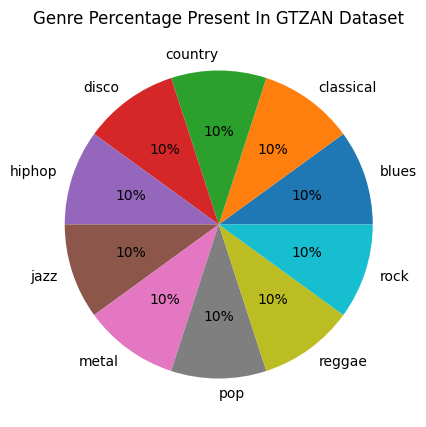

In [ ]:
import matplotlib.pyplot as plt

# Data for the pie chart
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal','pop', 'reggae', 'rock']
genre_percentages = [8, 8, 8, 8, 8, 8, 8, 8, 8,8]

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(genre_percentages, labels=genres, autopct="%0.0f%%")
plt.title("Genre Percentage Present In GTZAN Dataset")

# Save the pie chart as an image
plt.savefig("pie_chart.png")

# Display the pie chart
plt.show()
